In [1]:
%cd ..

/Users/treycole/Codes/WanPy


In [2]:
from WanPy.pythtb_Wannier import *
import WanPy.models as models
import WanPy.plotting as plot

from pythtb import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sympy as sp 
import scipy

### Diagonalizing model

In [3]:
delta = 1
t0 = 0.1
tprime = 0.5

model = models.chessboard(t0, tprime, delta)#.make_supercell([[2,0], [0,2]])

orbs = model.get_orb()
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)
lat_vecs = model.get_lat() # lattice vectors

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)

# adding disorder
# J = 2
# J_site = 2
# model.set_onsite(J, ind_i = J_site, mode='add')

# model.display()

In [4]:
# 2D k-mesh
nkx = 40
nky = 40
Nk = nkx*nky

k_mesh = gen_k_mesh(nkx, nky, flat=False, endpoint=False)
k_mesh_flat = gen_k_mesh(nkx, nky, flat=True, endpoint=False)

Reporting Chern number


In [5]:
u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

print(f"Chern number: {chern:.2f}")

Chern number: 0.00


#### Plotting bands

In [6]:
# k_path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
# k_label = (r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
# title = title = (rf"$C = {chern: .1f}$ | $\Delta = {delta},\ t_0 = {t0},\ t' = {tprime}$")

# plot.plot_bands(
#     model, k_path=k_path, k_label=k_label, sub_lat=True, red_lat_idx=high_E_sites, title=title)

#### Wannierizing

Don't want to use `solve_on_grid()`, since the we want a to exclude the endpoint.

Note: `solve_on_grid()` is equivalent to using `solve_on_point()` over the entire BZ (inclusive) and using `impose_pbc()` on all periodic directions

In [7]:
u_wfs_Wan = wf_array(model, [nkx, nky])

for i in range(k_mesh.shape[0]):
    for j in range(k_mesh.shape[1]):
        u_wfs_Wan.solve_on_one_point(k_mesh[i,j], [i,j])

Define trial functions and Wannierize

In [8]:
omit_sites = None
tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site

In [9]:
w0, psi_til_wan = Wannierize(model, u_wfs_Wan, tf_list, ret_psi_til=True)
u_tilde_wan = get_bloch_wfs(model, psi_til_wan, k_mesh, inverse=True)
M = k_overlap_mat(model, u_tilde_wan) # [kx, ky, b, m, n]

In [10]:
spread, expc_rsq, expc_r_sq = spread_recip(model, M, decomp=True)

print(f"Reciprocal space spread: {spread[0]}")
print(rf"Reciprocal space Omega_I = {spread[1]}")
print(rf"Reciprocal space \tilde{{Omega}} = {spread[2]}")
print(rf"Omega_I + \tilde{{Omega}} = {spread[1] + spread[2]}" )
print(f"Reciprocal space <r^2> = {expc_rsq}")
print(f"Reciprocal space <r>^2 = {expc_r_sq}")

Reciprocal space spread: (0.0811413859716741+0j)
Reciprocal space Omega_I = 0.07400219493882307
Reciprocal space \tilde{Omega} = (0.007139191032851015+0j)
Omega_I + \tilde{Omega} = (0.08114138597167408+0j)
Reciprocal space <r^2> = [[-6.31208952e-18+0.j -1.41590027e-17+0.j]]
Reciprocal space <r>^2 = [0.08114139+0.j]


In [11]:
spread, expc_rsq, expc_r_sq = spread_real(model, w0, decomp=True)

print(f"Real space spread: {spread[0]}")
print(rf"Real space Omega_I = {spread[1]}")
print(rf"Real space \tilde{{Omega}} = {spread[2]}")
print(rf"Omega_I + \tilde{{Omega}} = {spread[1] + spread[2]}" )
print(f"Real space <r^2> = {expc_rsq}")
print(f"Real space <r>^2 = {expc_r_sq}")

Real space spread: (0.08128178269445892+2.961776837529175e-20j)
Real space Omega_I = (0.07412771141278404+2.961776837529175e-20j)
Real space \tilde{Omega} = 0.007154071281674873
Omega_I + \tilde{Omega} = (0.08128178269445892+2.961776837529175e-20j)
Real space <r^2> = [[-4.09582649e-17+0.j -7.59769616e-17+0.j]]
Real space <r>^2 = [0.08128178+2.96177684e-20j]


## Plotting

([<Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 1 Axes>],
 [<Axes: title={'center': "$C =  0.0$ | $\\Delta = 1,\\ t_0 = 0.1,\\ t' = 0.5$\nTrial fxns on sites [0]"}>,
  <Axes: title={'center': "$C =  0.0$ | $\\Delta = 1,\\ t_0 = 0.1,\\ t' = 0.5$\nTrial fxns on sites [0]"}>,
  <Axes: title={'center': "$C =  0.0$ | $\\Delta = 1,\\ t_0 = 0.1,\\ t' = 0.5$\nTrial fxns on sites [0]"}, xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

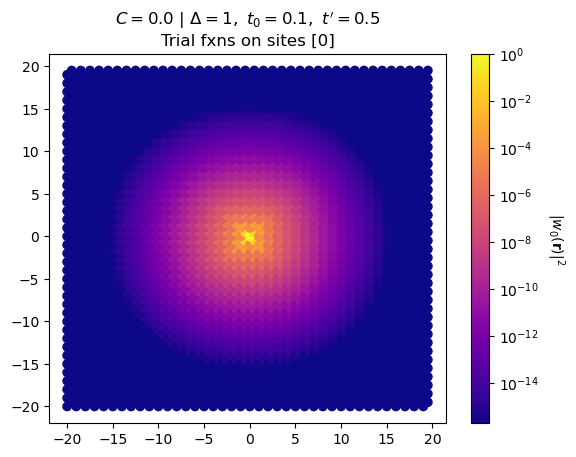

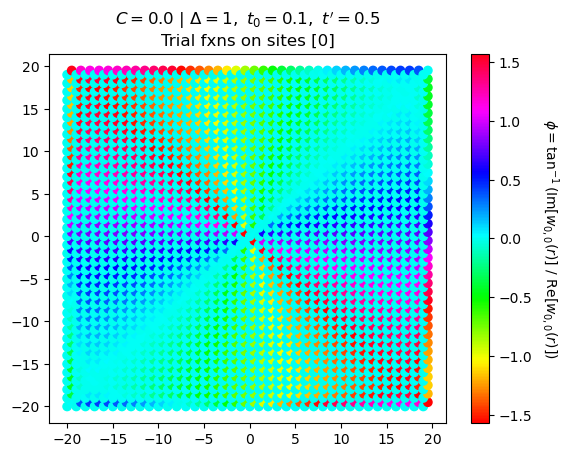

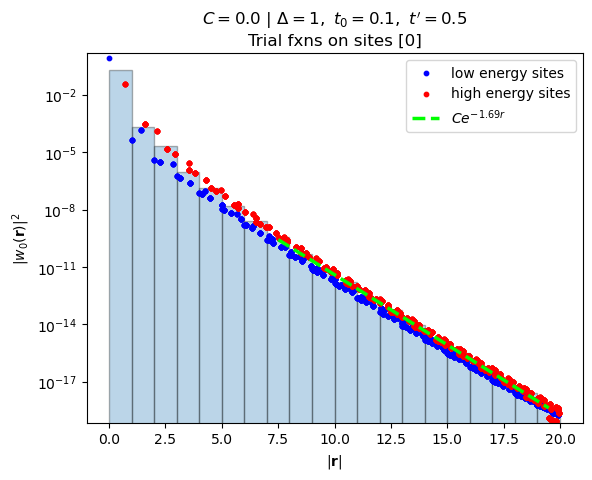

In [38]:
idx = 0
title = ( rf"$C = {chern: .1f}$ | $\Delta = {delta},\ t_0 = {t0},\ t' = {tprime}$"
             "\n" 
             rf"Trial fxns on sites {tf_list}")
save_name = f'w_{idx}_scatter_C={chern:.1f}_Delta={delta}_t0={t0}_tp={tprime}_tfxs={tf_list}.png'

plot.plot_Wan(w0, idx, orbs, lat_vecs, title=title, plot_phase=True, plot_decay=True, fit_rng=[7, 20])